AFTER CARFULL READING OF THE REQUIRMENT POPOSED:
THE ARTICLES RECOMMENDATION WILL BE ACCOMPLISHED BY 
1- Preparing data and Curating articles content for better data manipulation and enhancing algorithm performance
2-APPLYING SUPERVISED MACHINE LEARNING ALGORITHM TO CALLSIFY ARTICLE CATEGORY 
3- APPLYING UNSUBERVISED MACHINE LEARNING ALGORITHM TO GROUP ARTICLES INSIDE EACH CATEGORY
4- DOCUMENTATION AND CONCLUSION


# Libraries

In [63]:
# IMPORTING THE REQUIRED LIBRARY FOR CALSSIFICATION AND GROUPING 
import json
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import adjusted_rand_score



# 1- Preparing data and Curating articles content for better data manipulation and enhancing algorithm performance

In [64]:
# text cleanup
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
#words will be stemed
nltk.download('stopwords')
stemer= SnowballStemmer('english')
#stopwords will be removed from articles
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
    text: text to be cleaned 
    return:cleaned string
    """
  
    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    # lowercase text
    text = text.lower()     
    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    
    # removes any words =< 2 or >= 15 letters
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 15))

    # Stemming the words
    text = ' '.join([stemer.stem(word) for word in text.split()])
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tarek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
#IMPORTING THE ARTICLES.JSON FILES WHICH INCLUDES THE DATA SET THAT WE WILL WORK WITH.
# OPENING JSON  file
f = open ('articles.json', "r")
# Reading from file
data = json.loads(f.read())
# READING FILE CONTENT INTO PANDAS DATA FRAME
articles = pd.DataFrame(data)
#CLOSING FILE
f.close()

In [78]:
# CHECK OUT THE INTERNAL STRUCTURE OF DATAFRAME CONTENT
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      2481 non-null   object
 1   title     2481 non-null   object
 2   category  2481 non-null   object
dtypes: object(3)
memory usage: 58.3+ KB


In [79]:
# CHECK OUT THE first 10  articles in the dataframe
articles.head(10)

,body,title,category
0,Protecting Netflix Viewing Privacy at Scale\r\...,Protecting Netflix Viewing Privacy at Scale,Engineering
1,Introducing Winston — Event driven Diagnostic ...,Introducing Winston - Event driven Diagnostic ...,Engineering
2,Performance & Usage at Instagram\r\n\r\nAt Ins...,Performance & Usage at Instagram,Engineering
3,The simple example of calculating and formatti...,Refactoring a javascript video store,Engineering
4,Billing applications have transactions that ne...,Netflix Billing Migration to AWS - Part III,Engineering
5,Distributed Resource Scheduling with Apache Me...,Distributed Resource Scheduling with Apache Mesos,Engineering
6,Global Languages Support at Netflix\r\n\r\nTes...,Global Languages Support at Netflix - Testing ...,Engineering
7,"Ok, this one might be a little different from ...","How Barriers to Entry Confused Me Terribly, an...",Startups & Business
8,"This article is by Andy Smith, author, entrepr...",The Ancient Origins of Storytelling and How Yo...,Startups & Business
9,Somewhere along the continuum of the art versu...,How To Choose The Right Business Ideas,Startups & Business


In [80]:
# cleaning articles content in a new column "cleaned body"
articles['cleaned_body'] = articles['body'].apply(clean_text)

In [81]:
articles['cleaned_body']

0       protect netflix view privaci scale open connec...
1       introduc winston event driven diagnost remedi ...
2       perform usag instagram instagram treat perform...
3       simpl exampl calcul format bill video store op...
4       bill applic transact need acid complianc proce...
                              ...                        
2476    earli stage focus unit econom profit corpor pr...
2477    tip nail success product launch past two year ...
2478    rout defens ai startup simpl framework underst...
2479    faster. faster. faster. i'd like talk fast. le...
2480    netflix place peopl win. exceed expectations. ...
Name: cleaned_body, Length: 2481, dtype: object

In [82]:
# create a copy of articles datafram
articles_copy=articles.copy()
# separting input and output 
artcat=articles['category']
#drop category column from the data frame
articles=articles.drop(columns='category')

# 2-  APPLYING SUPERVISED MACHINE LEARNING ALGORITHM TO CALLSIFY ARTICLE CATEGORY

In [71]:
# splitiing data To training and testing
#X_train, X_test, y_train, y_test = train_test_split(articles['cleaned_body'],artcat, test_size=0.2)

# splitiing data To training ,validating and testing

train, validate, test = \
              np.split(articles.sample(frac=1, random_state=42), 
                       [int(.6*len(articles)), int(.8*len(articles))])
              
x, x_test, y, y_test = train_test_split(articles['cleaned_body'],artcat,test_size=0.2,train_size=0.8)
X_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [72]:
# pipeling input data to the model
#TfidfVectorizer Transforms text to feature vectors that can be used as input to estimator.
# Compute chi-squared stats taking two arrays X and y#
#LinearSVC using SVC clasifier
pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi',  SelectKBest(chi2, k=10000)),
                     ('clf', LinearSVC(C=1.0, penalty='l1', max_iter=3000, dual=False))])


In [73]:
#Fitting the model with the training data
model = pipeline.fit(X_train, y_train)


In [74]:
# showing  model accuracy score with validating and testing data 
print("accuracy score for validation data: " + str(model.score(x_cv, y_cv)))
print("accuracy score for testing data: " + str(model.score(x_test, y_test)))


accuracy score for validation data: 0.8669354838709677
accuracy score for testing data: 0.8531187122736419


In [75]:
# predicting category for a new article
art=" infrastructur rhyme elasticsearch state https angular rail contain api framework github dataset return homepag program pipelin machin deep learn render paramet queri backend return neural network algorithm microservic open sourc refactor model databas perform data configur request applic function node server memori architectur code Startups & Business: javascript enabl color stori make emot rekhi founder current disabl project invis qualit product develop notif notejoy medium ceo notejoy sprint sketch book text onboard delight clap build product ux icon email share lean feedback intercom custom roadmap research usabl visual screen user share email product manag product design Product & Design: ask question refer id healthi got cover appl competit audienc success ceo strategi candid facebook growth hit click robot say convers econom week channel busi campaign seo earli social person day entrepreneur founder network effect sale past market hire employe everyon startup growth team investor compani accuracy score: 0.869215291750503"
print(model.predict([art]))


['Engineering']


# 3- APPLYING UNSUBERVISED MACHINE LEARNING ALGORITHM TO GROUP ARTICLES INSIDE EACH CATEGORY

In [84]:
# splitting data frame into 3 data frame based on category provided
dfengineering = articles_copy[articles_copy['category'] == 'Engineering']
dfbusiness = articles_copy[articles_copy['category'] == 'Startups & Business']
dfdesign = articles_copy[articles_copy['category'] == 'Product & Design']

In [87]:
#TfidfVectorizer Transforms text to feature vectors that can be used as input to estimator from the 3 .
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
Engineering = vectorizer.fit_transform(dfengineering.body)

pd.DataFrame(Engineering.toarray(), columns=vectorizer.get_feature_names()).head()




,00,000,000 000,001,01,08,09,10,10 000,10 100,...,yield,yields,york,york city,young,youtube,zero,zone,zones,zookeeper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.044062,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023205,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037552,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.079402,0.0,0.0


In [88]:
Business=vectorizer.fit_transform(dfbusiness.body)

pd.DataFrame(Business.toarray(), columns=vectorizer.get_feature_names()).head()



,00,000,000 000,000 customers,000 employees,000 month,000 new,000 people,000 users,01,...,zapier,zappos,zendesk,zenefits,zero,zone,zones,zoom,zuckerberg,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.080081,0.0,0.0,0.000000,0.0,0.0,0.0,0.033385,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.024693,0.0,0.0,0.0,0.000000,0.0


In [89]:
Design=vectorizer.fit_transform(dfdesign.body)
pd.DataFrame(Design.toarray(), columns=vectorizer.get_feature_names()).head()


,000,10,10 000,10 minutes,10 years,100,1000,10x,11,12,...,york,york times,young,younger,youtube,zendesk,zero,zone,zoom,zooming
0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.116936,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.04462,0.0,0.0,0.0,0.0,0.02086,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


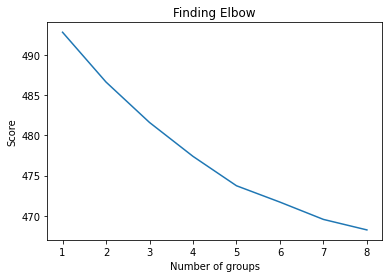

In [98]:
score = []
k_groups = 8

for i in range(1,k_groups + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(Engineering)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_groups + 1 ),score)
plt.title('Finding Elbow')
plt.xlabel('Number of groups')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

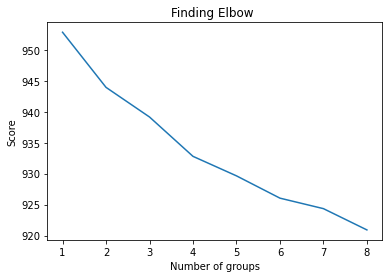

In [99]:
score = []
k_groups = 8

for i in range(1,k_groups + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(Business)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_groups + 1 ),score)
plt.title('Finding Elbow ')
plt.xlabel('Number of groups')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

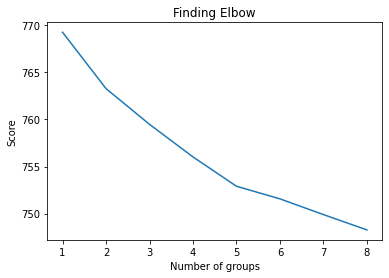

In [100]:
score = []
k_groups = 8

for i in range(1,k_groups + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(Design)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_groups + 1 ),score)
plt.title('Finding Elbow')
plt.xlabel('Number of groups')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

In [119]:
k_groups = 4

In [120]:
Engmodel = KMeans(n_clusters=k_groups, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
Engmodel.fit(Engineering)

KMeans(max_iter=600, n_clusters=4, random_state=0, tol=1e-06)

In [121]:
Article_Group = Engmodel.predict(Engineering)
dfengineering['Article_Group'] = Article_Group
dfengineering.head()

C:\Users\Tarek\AppData\Local\Temp/ipykernel_21520/3252874688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfengineering['Article_Group'] = Article_Group


,body,title,category,cleaned_body,Article_Group
0,Protecting Netflix Viewing Privacy at Scale\r\...,Protecting Netflix Viewing Privacy at Scale,Engineering,protect netflix view privaci scale open connec...,2
1,Introducing Winston — Event driven Diagnostic ...,Introducing Winston - Event driven Diagnostic ...,Engineering,introduc winston event driven diagnost remedi ...,1
2,Performance & Usage at Instagram\r\n\r\nAt Ins...,Performance & Usage at Instagram,Engineering,perform usag instagram instagram treat perform...,2
3,The simple example of calculating and formatti...,Refactoring a javascript video store,Engineering,simpl exampl calcul format bill video store op...,1
4,Billing applications have transactions that ne...,Netflix Billing Migration to AWS - Part III,Engineering,bill applic transact need acid complianc proce...,2


In [106]:

Busmodel = KMeans(n_clusters=k_groups, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
Busmodel.fit(Business)

KMeans(max_iter=600, n_clusters=4, random_state=0, tol=1e-06)

In [111]:
Article_Group = Busmodel.predict(Business)
dfbusiness['Article_Group']= Article_Group
dfbusiness.head(10)

C:\Users\Tarek\AppData\Local\Temp/ipykernel_21520/1317769349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbusiness['Article_Group']= Article_Group


,body,title,category,cleaned_body,Article_Group
7,"Ok, this one might be a little different from ...","How Barriers to Entry Confused Me Terribly, an...",Startups & Business,ok one might littl differ evergreen collect re...,3
8,"This article is by Andy Smith, author, entrepr...",The Ancient Origins of Storytelling and How Yo...,Startups & Business,articl andi smith author entrepreneur advisor ...,1
9,Somewhere along the continuum of the art versu...,How To Choose The Right Business Ideas,Startups & Business,somewher along continuum art versus scienc deb...,1
10,Company Culture is an annoying subject to rese...,Most Company Culture Posts are Fluffy Bullshit...,Startups & Business,compani cultur annoy subject research. it mush...,1
11,Great businesses don’t have to be big — and bi...,Why Value Capture is the Most Important Busine...,Startups & Business,great busi don't big big busi awful. measur qu...,3
12,Value Creation\r\n\r\nBusiness begins with val...,Why Value Creation is the Foundation of Busine...,Startups & Business,valu creation busi begin valu creation. purpos...,0
13,Strategic Alliances\r\n\r\nIn the quest to bui...,How to Think About All Strategic Alliances — T...,Startups & Business,strateg allianc quest build busi allianc key g...,1
14,Eight common dysfunctions of design teams (and...,Eight common dysfunctions of design teams (and...,Startups & Business,eight common dysfunct design team design partn...,1
15,Please Make Yourself Uncomfortable\r\n\r\nBy K...,Please Make Yourself Uncomfortable,Startups & Business,pleas make uncomfort ken norton product partne...,1
16,After a full day of understanding the problem ...,Sprint: Friday,Startups & Business,full day understand problem choos target sprin...,2


In [108]:

Desmodel = KMeans(n_clusters=k_groups, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
Desmodel.fit(Design)

KMeans(max_iter=600, n_clusters=4, random_state=0, tol=1e-06)

In [112]:
Article_Group = Desmodel.predict(Design)
dfdesign['Article_Group'] = Article_Group
dfdesign.head(10)

C:\Users\Tarek\AppData\Local\Temp/ipykernel_21520/3502324586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdesign['Article_Group'] = Article_Group


,body,title,category,cleaned_body,Article_Group
57,The role of product management in technology f...,What is Product Management?,Product & Design,role product manag technolog firm critic impor...,0
62,"Last year, John Maeda published his inaugural ...",Design in Tech Report 2016,Product & Design,last year john maeda publish inaugur #designin...,2
64,Techmeme\n\nNuzzel\n\nCurated Newsletters\n\nB...,My Daily Learning Ritual,Product & Design,techmem nuzzel curat newslett book product eve...,1
65,"Over the second half of the 1990s, Porsche hat...",Using Pricing to Inform Your Roadmap,Product & Design,second half 1990s porsch hatch plan new car. a...,3
66,Three Ways of Generating Trust for Your Produc...,Three Ways of Generating Trust for Your Product,Product & Design,three way generat trust product jenni wanger a...,1
67,How product managers can make meetings great a...,How product managers can make meetings great a...,Product & Design,product manag make meet great nis frome august...,0
68,Five Reasons Not to Trust Your Analytics Data\...,Five Reasons Not to Trust Your Analytics Data,Product & Design,five reason trust analyt data karin mass augus...,1
74,Feature prioritization is always a hot topic f...,7 Strategies to Choose the Best Features for Y...,Product & Design,featur priorit alway hot topic product teams. ...,3
79,The Hierarchy of Engagement\r\n\r\nThe Fuel to...,The Hierarchy of Engagement,Product & Design,hierarchi engag fuel build endur billion dolla...,0
86,"Product Rockstars have Head, Hands, and Heart\...","Product Rockstars have Head, Hands, and Heart",Product & Design,product rockstar head hand heart fred eser aug...,0


In [128]:
# appending data frames
Finaldf = dfengineering.append([dfdesign, dfbusiness])
Finaldf.head()


,body,title,category,cleaned_body,Article_Group
0,Protecting Netflix Viewing Privacy at Scale\r\...,Protecting Netflix Viewing Privacy at Scale,Engineering,protect netflix view privaci scale open connec...,2
1,Introducing Winston — Event driven Diagnostic ...,Introducing Winston - Event driven Diagnostic ...,Engineering,introduc winston event driven diagnost remedi ...,1
2,Performance & Usage at Instagram\r\n\r\nAt Ins...,Performance & Usage at Instagram,Engineering,perform usag instagram instagram treat perform...,2
3,The simple example of calculating and formatti...,Refactoring a javascript video store,Engineering,simpl exampl calcul format bill video store op...,1
4,Billing applications have transactions that ne...,Netflix Billing Migration to AWS - Part III,Engineering,bill applic transact need acid complianc proce...,2


In [130]:
# writing output to Json file 
#@#data = Finaldf.to_json(orient='index')
Finaldf.to_json('classfied_grouped_articles.json', orient = 'split', compression = 'infer', index = 'true')
